<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Classificação
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Classificação;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. Pinguins

Neste exercício, vamos utilizar uma base de dados com informações sobre penguins. A idéia é prever a espécie do penguin (**species**) baseado em suas características físicas e geográficas (variáveis preditivas).

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
penguim = sns.load_dataset('penguins')

In [5]:
penguim['bill_length_mm'] = penguim['bill_length_mm'].fillna(penguim['bill_length_mm'].mean())
penguim['bill_depth_mm'] = penguim['bill_depth_mm'].fillna(penguim['bill_depth_mm'].mean())
penguim['flipper_length_mm'] = penguim['flipper_length_mm'].fillna(penguim['flipper_length_mm'].mean())
penguim['body_mass_g'] = penguim['body_mass_g'].fillna(penguim['body_mass_g'].mean())
penguim['sex']= penguim['sex'].fillna(penguim['sex'].mode()[0])

In [6]:
penguim.head(25)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,Male
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
5,Adelie,Torgersen,39.30000,20.60000,190.000000,3650.000000,Male
6,Adelie,Torgersen,38.90000,17.80000,181.000000,3625.000000,Female
7,Adelie,Torgersen,39.20000,19.60000,195.000000,4675.000000,Male
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,Male
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,Male


### **1.1. Análise exploratória**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos e variável resposta da base de dados. Comente o que observou em cada gráfico.

 - Atributos numéricos por espécie:

**Observação**: refiz o grafico , e traduzi os eixos.

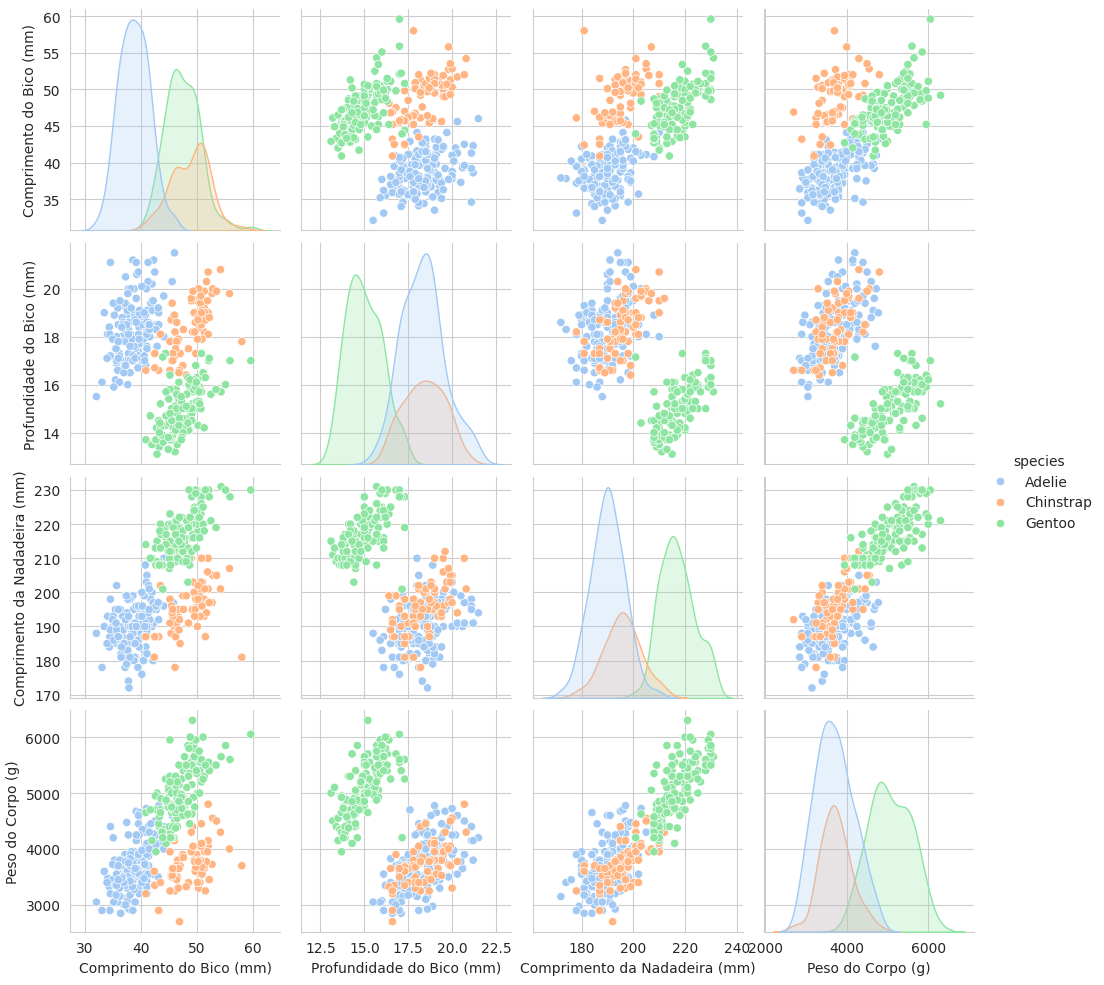

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar o gráfico com o estilo desejado
with sns.axes_style('whitegrid'):
    grafico = sns.pairplot(data=penguim.drop(['sex', 'island'], axis=1), hue="species", palette="pastel")

# Traduzir os rótulos dos eixos para o gráfico
for ax in grafico.axes.flatten():
    # Traduzir eixo X
    ax.set_xlabel(ax.get_xlabel().replace('bill_length_mm', 'Comprimento do Bico (mm)')
                          .replace('bill_depth_mm', 'Profundidade do Bico (mm)')
                          .replace('flipper_length_mm', 'Comprimento da Nadadeira (mm)')
                          .replace('body_mass_g', 'Peso do Corpo (g)'), fontsize=10)
    # Traduzir eixo Y
    ax.set_ylabel(ax.get_ylabel().replace('bill_length_mm', 'Comprimento do Bico (mm)')
                          .replace('bill_depth_mm', 'Profundidade do Bico (mm)')
                          .replace('flipper_length_mm', 'Comprimento da Nadadeira (mm)')
                          .replace('body_mass_g', 'Peso do Corpo (g)'), fontsize=10)

plt.show()


In [8]:
penguim.query("species == 'Adelie'").describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,152.0,38.825144,2.686991,32.1,36.775,38.8,40.8,46.0
bill_depth_mm,152.0,18.338495,1.216483,15.5,17.475,18.4,19.0,21.5
flipper_length_mm,152.0,190.025758,6.578130,172.0,186.000,190.0,195.0,210.0
body_mass_g,152.0,3703.958910,458.848798,2850.0,3350.000,3700.0,4000.0,4775.0


In [9]:
penguim[penguim["species"] == "Adelie"]["bill_length_mm"].describe().T


count    152.000000
mean      38.825144
std        2.686991
min       32.100000
25%       36.775000
50%       38.800000
75%       40.800000
max       46.000000
Name: bill_length_mm, dtype: float64

In [10]:
penguim[penguim["species"] == "Adelie"].describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,152.0,38.825144,2.686991,32.1,36.775,38.8,40.8,46.0
bill_depth_mm,152.0,18.338495,1.216483,15.5,17.475,18.4,19.0,21.5
flipper_length_mm,152.0,190.025758,6.578130,172.0,186.000,190.0,195.0,210.0
body_mass_g,152.0,3703.958910,458.848798,2850.0,3350.000,3700.0,4000.0,4775.0


In [11]:
penguim[penguim["species"] == "Gentoo"].describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,124.0,47.475983,3.086123,40.900000,45.275,47.25,49.525,59.6
bill_depth_mm,124.0,14.999606,0.996447,13.100000,14.200,15.00,15.725,17.3
flipper_length_mm,124.0,217.055768,6.621801,200.915205,212.000,216.00,221.000,231.0
body_mass_g,124.0,5068.965761,508.164382,3950.000000,4700.000,5000.00,5500.000,6300.0


In [12]:
penguim[penguim["species"] == "Chinstrap"].describe().T


,count,mean,std,min,25%,50%,75%,max
bill_length_mm,68.0,48.833824,3.339256,40.9,46.35,49.55,51.075,58.0
bill_depth_mm,68.0,18.420588,1.135395,16.4,17.50,18.45,19.400,20.8
flipper_length_mm,68.0,195.823529,7.131894,178.0,191.00,196.00,201.000,212.0
body_mass_g,68.0,3733.088235,384.335081,2700.0,3487.50,3700.00,3950.000,4800.0


In [13]:
penguim[['bill_depth_mm']].describe().T


,count,mean,std,min,25%,50%,75%,max
bill_depth_mm,344.0,17.15117,1.969027,13.1,15.6,17.3,18.7,21.5


In [14]:
penguim[['flipper_length_mm']].describe().T


,count,mean,std,min,25%,50%,75%,max
flipper_length_mm,344.0,200.915205,14.020657,172.0,190.0,197.0,213.0,231.0


In [15]:
penguim[['body_mass_g']].describe().T

,count,mean,std,min,25%,50%,75%,max
body_mass_g,344.0,4201.754386,799.613058,2700.0,3550.0,4050.0,4750.0,6300.0


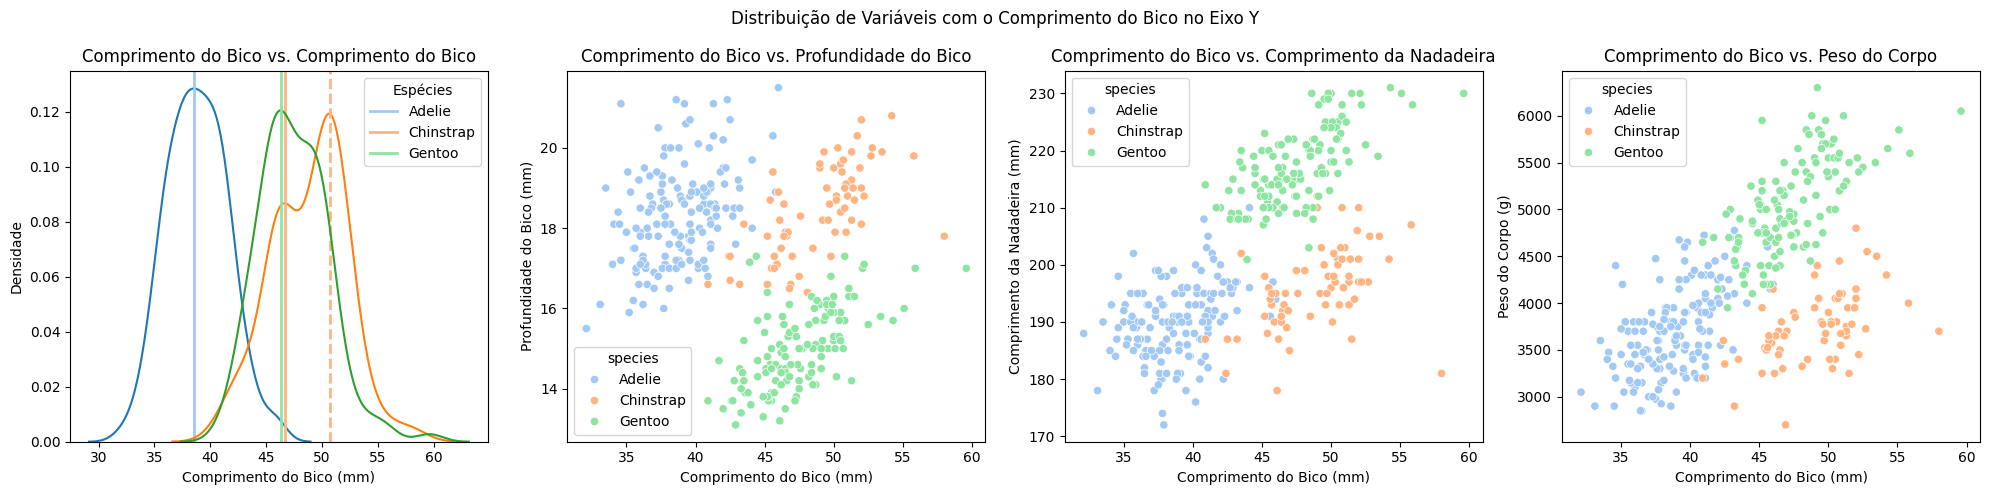

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.lines import Line2D  


# Criar o gráfico
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# 1. Comprimento do Bico vs. Comprimento do Bico (Histograma)

axes[0].set_title('Comprimento do Bico vs. Comprimento do Bico')
axes[0].set_xlabel('Comprimento do Bico (mm)')
axes[0].set_ylabel('Densidade')

# Criar um dicionário para mapear espécies a cores
species_colors = {species: color for species, color in zip(penguim["species"].unique(), sns.color_palette("pastel"))}

# Encontrar os picos das curvas KDE para cada espécie e plotar as linhas verticais na primeira coluna
for species in penguim["species"].unique():
    subset = penguim[penguim["species"] == species]
    kde = sns.kdeplot(data=subset, x="bill_length_mm", fill=False, common_norm=True, ax=axes[0]) # Plotar na primeira coluna (axes[0])
    x = kde.get_lines()[-1].get_xdata()
    y = kde.get_lines()[-1].get_ydata()
    peaks, _ = find_peaks(y)

    # Verificar se há picos encontrados para a espécie
    if peaks.size > 0:
        # Primeiro pico
        peak_x1 = x[peaks[0]]
        axes[0].axvline(peak_x1, color=species_colors[species], linestyle="-", linewidth=2)

        # Segundo pico apenas para "Chinstrap" (se houver um segundo pico)
        if species == "Chinstrap" and peaks.size > 1:
            peak_x2 = x[peaks[1]]
            axes[0].axvline(peak_x2, color=species_colors[species], linestyle="--", linewidth=2)

# Adicionar legenda manualmente com os identificadores de espécies e cores
legend_elements = [Line2D([0], [0], color=color, lw=2, label=species) for species, color in species_colors.items()]
axes[0].legend(handles=legend_elements, title="Espécies", loc="upper right")


# 2. Comprimento do Bico vs. Profundidade do Bico
sns.scatterplot(data=penguim, x="bill_length_mm", y="bill_depth_mm", hue="species", palette="pastel", ax=axes[1])
axes[1].set_title('Comprimento do Bico vs. Profundidade do Bico')
axes[1].set_xlabel('Comprimento do Bico (mm)')
axes[1].set_ylabel('Profundidade do Bico (mm)')

# 3. Comprimento do Bico vs. Comprimento da Nadadeira
sns.scatterplot(data=penguim, x="bill_length_mm", y="flipper_length_mm", hue="species", palette="pastel", ax=axes[2])

axes[2].set_title('Comprimento do Bico vs. Comprimento da Nadadeira')
axes[2].set_xlabel('Comprimento do Bico (mm)')
axes[2].set_ylabel('Comprimento da Nadadeira (mm)')

# 4. Comprimento do Bico vs. Peso do Corpo
sns.scatterplot(data=penguim, x="bill_length_mm", y="body_mass_g", hue="species", palette="pastel", ax=axes[3])
axes[3].set_title('Comprimento do Bico vs. Peso do Corpo')
axes[3].set_xlabel('Comprimento do Bico (mm)')
axes[3].set_ylabel('Peso do Corpo (g)')

fig.suptitle('Distribuição de Variáveis com o Comprimento do Bico no Eixo Y')
plt.tight_layout()
plt.show()

**insights 1:**
Comprimento do Bico vs. Comprimento do Bico
A curva do Adelie é mais concentrada em torno de 38 mm. A largura da curva sugere que a variabilidade do comprimento do bico dentro da espécie Adelie é menor do que para as outras duas.
A curva do Gentoo é a mais deslocada para a direita, com pico em torno de 46 mm, indicando que eles têm, em média, um comprimento de bico maior em comparação com as outras duas espécies.
A curva da Chinstrap é intermediária em relação ao Gentoo e ao Adelie, com dois picos , o primeiro sendo algo em torno de 47mm e o outro perto de 50mm.

Comprimento do Bico vs. Profundidade do Bico
na especie adelie vemos que os valores de profundidade do bico vão de 15mm até 21mm com valor medio sendo 18 , e os valores de comprimento do bico dela estão entre 32mm e 46mm com valor medio de 38mm.
na especie gentoo vemos que os valores de profundidade do bico vão de 13mm até 17mm com valor medio sendo 15mm , e os valores de comprimento do bico dela estão entre 40mm e 59mm com valor medio de 47mm.
na especie chinstrap vemos que os valores de profundidade do bico vão de 16mm até 20mm com valor medio sendo 18mm , e os valores de comprimento do bico dela estão entre 40mm e 58mm com valor medio de 48mm.
não parece haver nenhuma relação de causalidade entre o Comprimento do Bico e a  Profundidade do Bico

Comprimento do Bico vs. Comprimento da Nadadeira
na especie adelie vemos que os valores de comprimento da nadadeira vão de 172mm até 210mm com valor medio sendo 190mm
na especie gentoo vemos que os valores de comprimento da nadadeira vão de 200mm até 230mm com valor medio sendo 217mm
na especie chinstrap vemos que os valores de comprimento da nadadeira vão de 178mm até 212mm com valor medio sendo 195mm
parece haver uma relação de causalidade aqui,parece que  quanto maior é o bico maior é a nadadeira

Comprimento do Bico vs. Peso do Corpo
na especie adelie vemos que os valores de peso do corpo vão de 2850g até 4775g com peso medio sendo 3703g
na especie gentoo vemos que os valores de peso do corpo vão de 3950g até 6300g com peso medio sendo 5068g
na especie chinstrap vemos que os valores de peso do corpo vão de 2700 até 4800 com peso medio sendo 3733g
aqui tambem parece haver uma relação de causalidade , parece que quanto mais pesado é o pinguim maior sera o bico

nos graficos acime , em geral, podemos ver que os dados estão bem agrupados , logo o modelo conseguirá separar bem as classes em menos nós se depender desses atributos


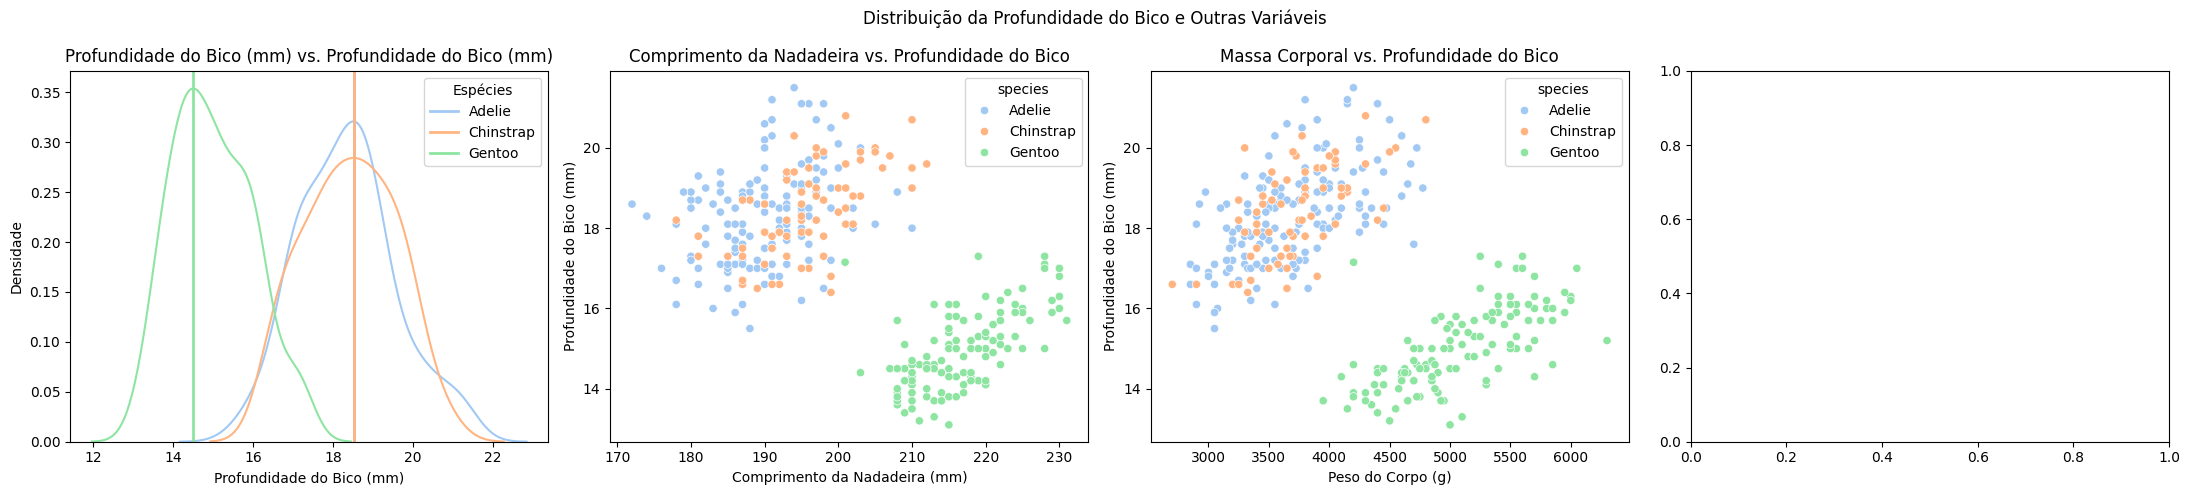

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, axes = plt.subplots(1, 4, figsize=(22, 5))

# Gráfico 1: Comprimento do Bico vs. Profundidade do Bico



# Gráfico 2: Profundidade do Bico vs. Profundidade do Bico

axes[0].set_title('Profundidade do Bico (mm) vs. Profundidade do Bico (mm)')
axes[0].set_xlabel("Profundidade do Bico (mm)")
axes[0].set_ylabel("Densidade")

# Dicionário de cores para cada espécie
species_colors = {species: color for species, color in zip(penguim["species"].unique(), sns.color_palette("pastel"))}

# Encontrar os picos e adicionar linhas verticais para cada espécie
for species in penguim["species"].unique():
    subset = penguim[penguim["species"] == species].dropna(subset=["bill_depth_mm"])  # Remover NaNs
    kde = sns.kdeplot(data=subset, x="bill_depth_mm", fill=False, common_norm=True, ax=axes[0], color=species_colors[species])
    x = kde.get_lines()[-1].get_xdata()
    y = kde.get_lines()[-1].get_ydata()
    peaks, _ = find_peaks(y)
    if peaks.size > 0:  # Verificar se existem picos
        peak_x = x[peaks[0]]
        axes[0].axvline(peak_x, color=species_colors[species], linestyle="-", linewidth=2)

# Adicionar legenda manualmente com os identificadores de espécies e cores
legend_elements = [Line2D([0], [0], color=color, lw=2, label=species) for species, color in species_colors.items()]
axes[0].legend(handles=legend_elements, title="Espécies", loc="upper right")
# Gráfico 3: Comprimento da Nadadeira vs. Profundidade do Bico
sns.scatterplot(data=penguim, x="flipper_length_mm", y="bill_depth_mm", hue="species", palette="pastel", ax=axes[1])
axes[1].set_title('Comprimento da Nadadeira vs. Profundidade do Bico')
axes[1].set_xlabel("Comprimento da Nadadeira (mm)")
axes[1].set_ylabel("Profundidade do Bico (mm)")

# Gráfico 4: Massa Corporal vs. Profundidade do Bico
sns.scatterplot(data=penguim, x="body_mass_g", y="bill_depth_mm", hue="species", palette="pastel", ax=axes[2])
axes[2].set_title('Massa Corporal vs. Profundidade do Bico')
axes[2].set_xlabel("Peso do Corpo (g)")
axes[2].set_ylabel("Profundidade do Bico (mm)")

fig.suptitle("Distribuição da Profundidade do Bico e Outras Variáveis")
plt.tight_layout()
plt.show()


**Insights 2:**
 Profundidade do Bico vs. Profundidade do Bico
 A curva KDE do Gentoo parece ser a mais larga, indicando uma maior variação na profundidade do bico dentro da espécie.
 em seguida vem a adelie, sua curva KDE é um pouco menor que a da Gentoo e ym pouco maior que a chinstrap, o que indica que sua variação é intermediaria.   
Ja a curva da Chinstrap é a mais estreita, mostrando menos variação na profundidade do bico. Isso pode indicar que os pinguins Chinstrap, dentro da espécie, são mais homogêneos na forma de seus bicos.
As curvas da Chinstrap e Adelie se sobrepõem consideravelmente, indicando que as profundidades de bico entre essas duas espécies são relativamente semelhantes.

Comprimento da Nadadeira vs. Profundidade do Bico
nesse grafico podemos ver que parece haver uma relação de causalidade , quanto maior a profundidade do bico maior o comprimento da nadadeira, porem a especie gentoo tem o bico menor que as outras duas especies
podemos ver tambem que a adele e chinstrap  estão bem misturados , o que causara mais nós, ja a gentoo esta bem separada das outras duas , o que tornara mais facil para o modelo separar.

Massa Corporal vs. Profundidade do Bico
quase a mesma coisa acontece aqui ,quanto maior a profundidade do bico , maior sera o peso , lembrando que o bico é menor da gentoo, porem é a mais pesada.
vemos tambem que aqui estão bem misturados a adelie e chinstrap , ja a gentoo esta bem separada.

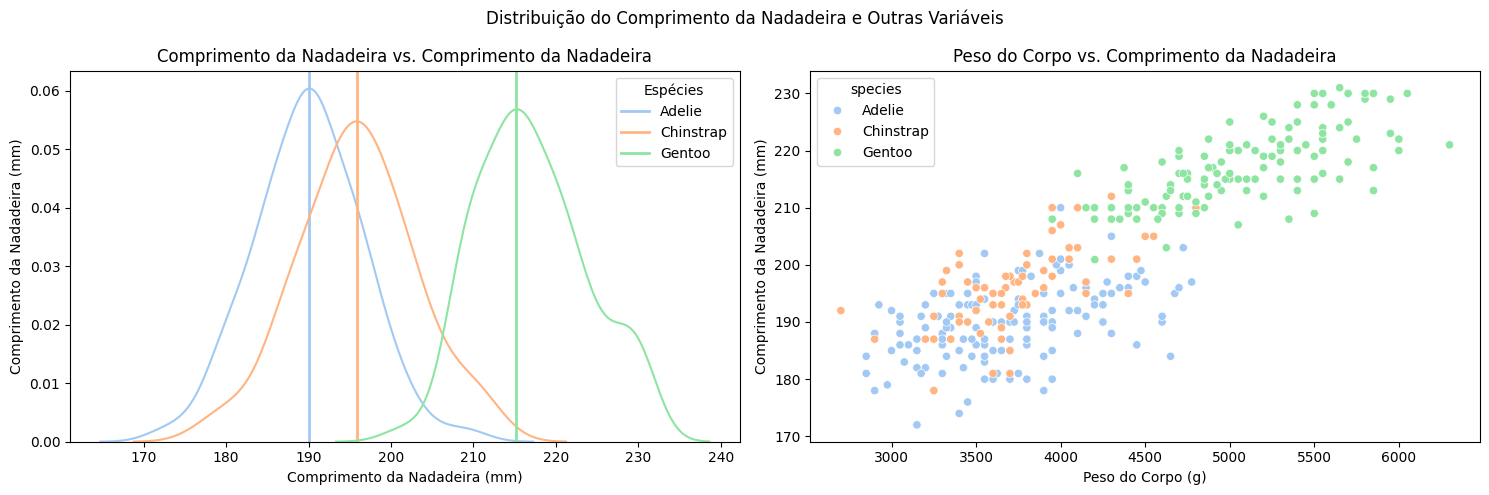

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Comprimento do Bico vs. Comprimento da Nadadeira


# Gráfico 2: Profundidade do Bico vs. Comprimento da Nadadeira


# Gráfico 3: Comprimento da Nadadeira vs. Comprimento da Nadadeira


axes[0].set_title('Comprimento da Nadadeira vs. Comprimento da Nadadeira')
axes[0].set_xlabel("Comprimento da Nadadeira (mm)")
axes[0].set_ylabel("Comprimento da Nadadeira (mm)")

# Dicionário de cores para cada espécie
species_colors = {species: color for species, color in zip(penguim["species"].unique(), sns.color_palette("pastel"))}

# Encontrar os picos e adicionar linhas verticais para cada espécie
for species in penguim["species"].unique():
    subset = penguim[penguim["species"] == species].dropna(subset=["flipper_length_mm"])  # Remover NaNs
    kde = sns.kdeplot(data=subset, x="flipper_length_mm", fill=False, common_norm=True, ax=axes[0], color=species_colors[species])
    x = kde.get_lines()[-1].get_xdata()
    y = kde.get_lines()[-1].get_ydata()
    peaks, _ = find_peaks(y)
    if peaks.size > 0:  # Verificar se existem picos
        peak_x = x[peaks[0]]
        axes[0].axvline(peak_x, color=species_colors[species], linestyle="-", linewidth=2)


# Adicionar legenda manualmente com os identificadores de espécies e cores
legend_elements = [Line2D([0], [0], color=color, lw=2, label=species) for species, color in species_colors.items()]
axes[0].legend(handles=legend_elements, title="Espécies", loc="upper right")

# Gráfico 4: Massa Corporal vs. Comprimento da Nadadeira
sns.scatterplot(data=penguim, x="body_mass_g", y="flipper_length_mm", hue="species", palette="pastel", ax=axes[1])
axes[1].set_title('Peso do Corpo vs. Comprimento da Nadadeira')
axes[1].set_xlabel("Peso do Corpo (g)")
axes[1].set_ylabel("Comprimento da Nadadeira (mm)")

fig.suptitle("Distribuição do Comprimento da Nadadeira e Outras Variáveis")
plt.tight_layout()
plt.show()


**Insights 3:**
Comprimento da Nadadeira vs. Comprimento da Nadadeira
A Gentoo possui a maior média de comprimento de nadadeira, com o pico da sua distribuição em torno de 215 mm. Isso sugere que a Gentoo é a maior especie de  pinguins das três espécies .
Sua curva é a mais larga das três, mostrando a maior variação no comprimento da nadadeira.

A Chinstrap possui o comprimento de nadadeira médio, com o pico da distribuição em torno de 195 mm.
Sua curva é um pouco mais larga que a da Adelie, mostrando um pouco mais de variação no comprimento da nadadeira dentro da espécie.

Adelie: A Adelie possui a menor média de comprimento de nadadeira, com o pico da distribuição em torno de 190 mm.
Sua curva é mais estreita, sugerindo menor variabilidade no comprimento da nadadeira dentro da espécie. Isso pode indicar que a Adelie é mais homogênea em relação a esse atributo físico.

As curvas da Chinstrap e do Gentoo se sobrepõem significativamente, mostrando que há uma faixa considerável de comprimento de nadadeira que é compartilhada por essas duas espécies.

Ja a  curva da Adelie se sobrepõe menos com as outras duas espécies, o que sugere que seus comprimentos de nadadeira são distintamente menores.

 Massa Corporal vs. Comprimento da Nadadeira
 podemos observar que quanto maior o comprimento maior vai ser o peso
 adelie e chinstrap estão misturadas , o que vai causa maior dificuldade para o modelo e ira criar mais nós, ja a gentoo esta bem separadaa das outras duas.


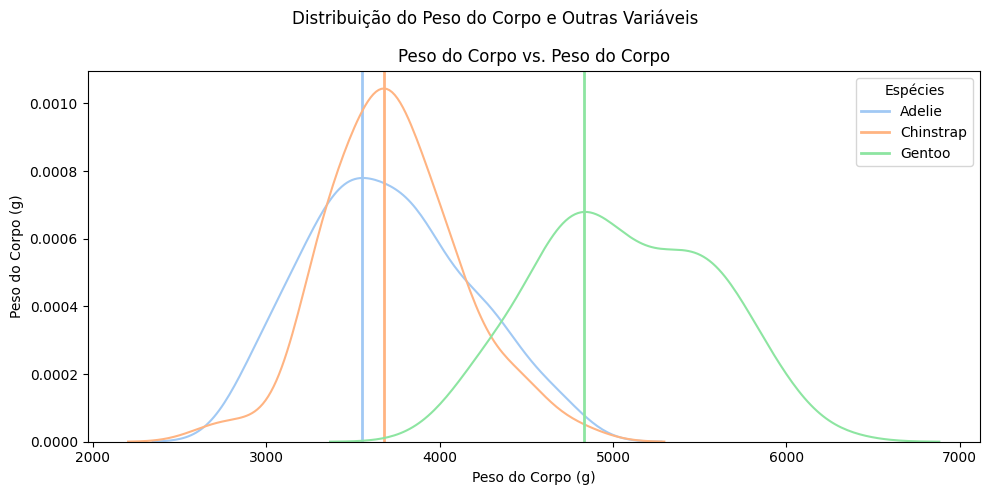

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(10, 5))


# Gráfico 4: Peso do Corpo vs. Peso do Corpo

axes.set_title('Peso do Corpo vs. Peso do Corpo')
axes.set_xlabel("Peso do Corpo (g)")
axes.set_ylabel("Peso do Corpo (g)")

species_colors = {species: color for species, color in zip(penguim["species"].unique(), sns.color_palette("pastel"))}

# Encontrar os picos e adicionar linhas verticais para cada espécie
for species in penguim["species"].unique():
    subset = penguim[penguim["species"] == species].dropna(subset=["body_mass_g"])  # Remover NaNs
    kde = sns.kdeplot(data=subset, x="body_mass_g", fill=False, common_norm=True, ax=axes, color=species_colors[species])
    x = kde.get_lines()[-1].get_xdata()
    y = kde.get_lines()[-1].get_ydata()
    peaks, _ = find_peaks(y)
    if peaks.size > 0:  # Verificar se existem picos
        peak_x = x[peaks[0]]
        axes.axvline(peak_x, color=species_colors[species], linestyle="-", linewidth=2)


# Adicionar legenda manualmente com os identificadores de espécies e cores
legend_elements = [Line2D([0], [0], color=color, lw=2, label=species) for species, color in species_colors.items()]
axes.legend(handles=legend_elements, title="Espécies", loc="upper right")



fig.suptitle("Distribuição do Peso do Corpo e Outras Variáveis")
plt.tight_layout()
plt.show()


**insights 4:**

As três espécies de pinguins têm distribuições de peso do corpo distintas. O Gentoo é significativamente mais pesada do que as outras duas espécies, com o pico da distribuição em torno de 5000 g. Os Adelie são os mais leves, com o pico da distribuição em torno de 3800 g. Os Chinstrap possuem um peso intermediário, com a distribuição centrada em torno de 3700 g.

 A variação no peso do corpo é maior para o Gentoo e menor para o Adelie. A curva do Gentoo é mais ampla, enquanto a curva da Adelie é mais estreita. Isso indica que os pinguins Gentoo têm uma maior variação de tamanho dentro da espécie, enquanto os Adelie são mais homogêneos em tamanho.

 As curvas da Adelie e da Chinstrap se sobrepõem em um grau considerável, sugerindo que há uma certa faixa de peso do corpo compartilhada por essas duas espécies. A curva do Gentoo está bem separada, mostrando que os pinguins Gentoo são significativamente maiores do que os outros.

 - Sexo por espécie:

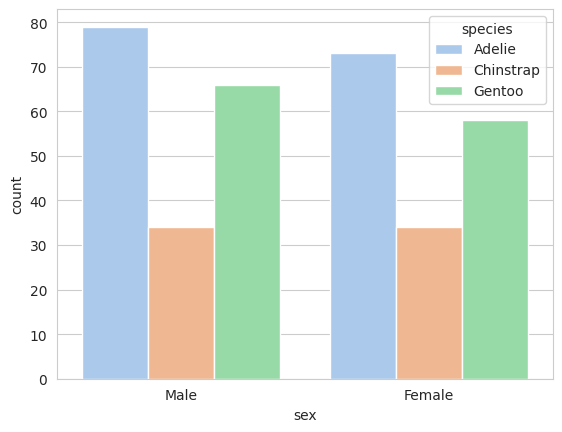

In [21]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='sex', hue="species", palette="pastel")

 - Ilha por espécie:

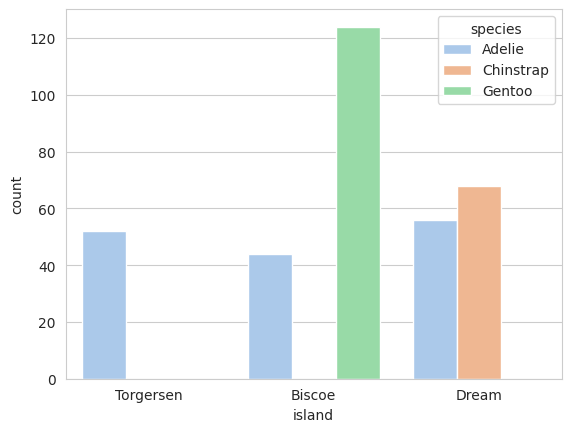

In [22]:
with sns.axes_style('whitegrid'):

  grafico = sns.countplot(data=penguim, x='island', hue="species", palette="pastel")

**insights 5**
podemos ver que em torgersen só há pinguins da especie adelie, em biscoe não há pinguins chinstrap e na dream não há gentoo, vemos que o unico que esta em todas as ilhas é a adelie, enquanto chinstrap e gentoo só estão em uma ilha.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilize os conceitos da aula para trata-los.

In [23]:
# resposta da questão 2.1
penguim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill_depth_mm      344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### **2.2. Variáveis categóricas**

Identifique as variáveis categóricas nominais e ordinais, crie uma nova coluna aplicando a técnica correta de conversão a seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_nom*" ou "*_ord*".

> **Nota**: Você não deve tratar a variável resposta.

> **Nota**: Por definição, árvores de decisão **não precisam** da transformação de atributos categóricos em numéricos. Contudo, por **limitação** do pacote Python Scikit Learn, devemos conduzir esta etapa. Mais informações neste [link](https://scikit-learn.org/stable/modules/tree.html#tree).

### **2.3. Limpeza**

Descarte as colunas categóricas originais e mantenha a variável resposta na primeira coluna do dataframe.

### **2.4. Treino/Teste**

Separe a base de dados em treino e teste utilizando uma proporção de 2/3 para treino e 1/3 para testes.

In [24]:
data = penguim.round(2)

In [25]:
data.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


In [26]:
# resposta da questão 2.4
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier()

In [28]:
data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


In [11]:
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'Male' else 1)

In [12]:
data['island'] = data['island'].apply(lambda x: 0 if x == 'Torgersen' else (1 if x == 'Biscoe' else 2))

In [13]:
data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,0
1,Adelie,0,39.5,17.4,186.0,3800.0,1
2,Adelie,0,40.3,18.0,195.0,3250.0,1


In [14]:
X = data[['island',	'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',	'body_mass_g', 'sex']]
y = data['species']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

 - **Variáveis preditoras (predictors)**

In [16]:
X_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
17,0,42.5,20.7,197.0,4500.0,0
24,1,38.8,17.2,180.0,3800.0,0
238,1,46.2,14.5,209.0,4800.0,1
145,2,39.0,18.7,185.0,3650.0,0
209,2,49.3,19.9,203.0,4050.0,0


In [17]:
X_train.shape

(258, 6)

In [18]:
X_test.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
194,2,50.9,19.1,196.0,3550.0,0
157,2,45.2,17.8,198.0,3950.0,1
225,1,46.5,13.5,210.0,4550.0,1
208,2,45.2,16.6,191.0,3250.0,1
318,1,48.4,14.4,203.0,4625.0,1


In [19]:
X_test.shape

(86, 6)

 - **Variável resposta (target)**

In [20]:
y_train.head()

,species
17,Adelie
24,Adelie
238,Gentoo
145,Adelie
209,Chinstrap


In [21]:
y_train.shape

(258,)

In [22]:
y_test.head()

,species
194,Chinstrap
157,Chinstrap
225,Gentoo
208,Chinstrap
318,Gentoo


In [23]:
y_test.shape

(86,)

## 3\. Modelagem

### **3.1. Treino**

Treine um modelo de **árvore de decisão** com os **dados de treino** (2/3). Gere o gráfico da árvore do modelo treinado e responda: quantas **folhas** a árvore treinada possui?

**Resposta:** 13 folhas

In [24]:
# resposta da questão 3.1
model = model.fit(X_train, y_train)

In [25]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'monotonic_cst': None,
 'feature_names_in_': array(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
        'body_mass_g', 'sex'], dtype=object),
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 'n_classes_': 3,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x7bea01c7d370>}

In [ ]:
!pip install graphviz


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


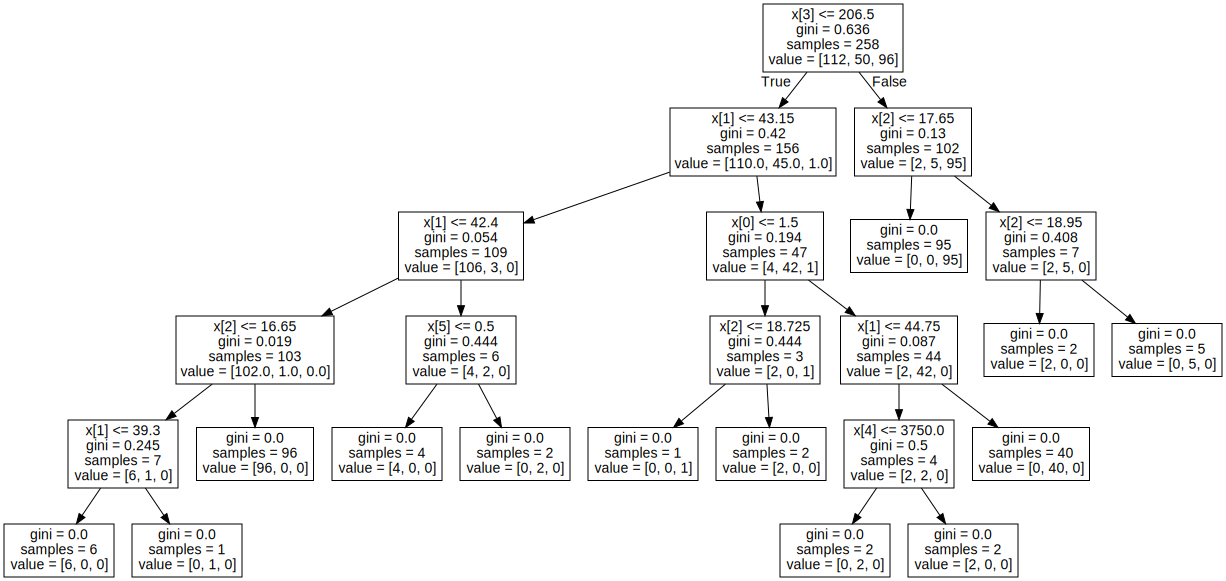

In [26]:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(tree_data)
graph

### **3.2. Avaliação**

**a.** Matriz de Confusão

Calcule e visualize a **matriz de confusão** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3). Comente os resultados.

**Comentário:** ?

In [ ]:
# resposta da questão 3.2.a

 - **Posição predita**

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred[0:5]

array(['Chinstrap', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo'],
      dtype=object)

In [29]:
y_pred.shape

(86,)

 - **Posição teste**

In [30]:
y_test[0:5]

,species
194,Chinstrap
157,Chinstrap
225,Gentoo
208,Chinstrap
318,Gentoo


In [31]:
y_test.shape

(86,)

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[39  0  1]
 [ 0 18  0]
 [ 0  0 28]]


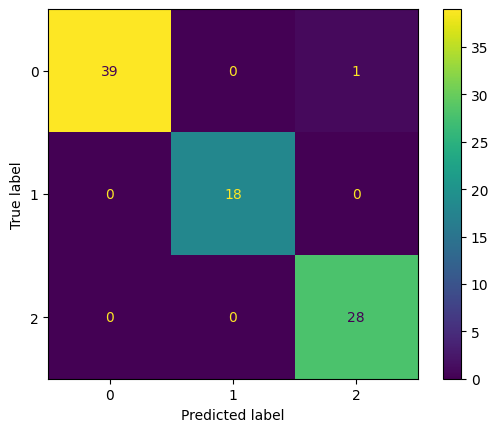

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assumindo que você já calculou y_pred

# Calcula a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Cria o objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plota a matriz de confusão
disp.plot()
plt.show()

**b.** Acurácia

Calcule a **acurácia** para o modelo de **árvore de decisão** treinado com os **dados de teste** (1/3).

> **Nota:** Como referência, eu consegui uma acurácia de approx. 96% (sua acurácia pode não ser igual).

In [ ]:
# resposta da questão 3.2.b

In [39]:
total = cm.sum()
print(total)

86


In [40]:
acertos = np.diag(cm).sum()
print(acertos)

85


In [41]:
acuracia = acertos / total
print(acuracia)

0.9883720930232558


In [42]:
print(f"{round(100 * acuracia, 2)}%")

98.84%


O pacote Scikit-Learn possuí uma série de métodos que facilitam o cálculo de métricas de avaliação, como a **acurácia**. Uma lista completa de métricas implementadas pelo pacote por ser encontrada neste [link](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [43]:
from sklearn.metrics import accuracy_score

In [46]:
acuracia = accuracy_score(y_test, y_pred)
print(acuracia)

0.9883720930232558


In [47]:
print(f"{round(100 * acuracia, 2)}%")

98.84%


## 4\. Predição  

### **4.1. Novo penguim**

Qual a espécie de um penguim com as seguintes características:


| island | bill_length_mm | bill_depth_mm | flipper_length_mm | body_mass_g | sex |
| --- | --- | --- | --- | --- | --- |
| Biscoe | 38.2 | 18.1 | 185.0 | 3950.0 | Male |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2. A ordem dos atributos importa, deve ser a mesma usada na modelagem.

> **Nota:** Como referência eu obtive **adelie** como espécie predita (a sua predição pode não ser igual).

In [49]:
penguim.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male


In [48]:
data.head(1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,0


In [50]:
# resposta da questão 4.1
novo_pinguim = np.array([[0, 38.2, 18.1, 185.0, 3950.0, 0]])

In [51]:
especie = model.predict(novo_pinguim.reshape(1, -1))
print(especie)

['Adelie']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [52]:
model.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

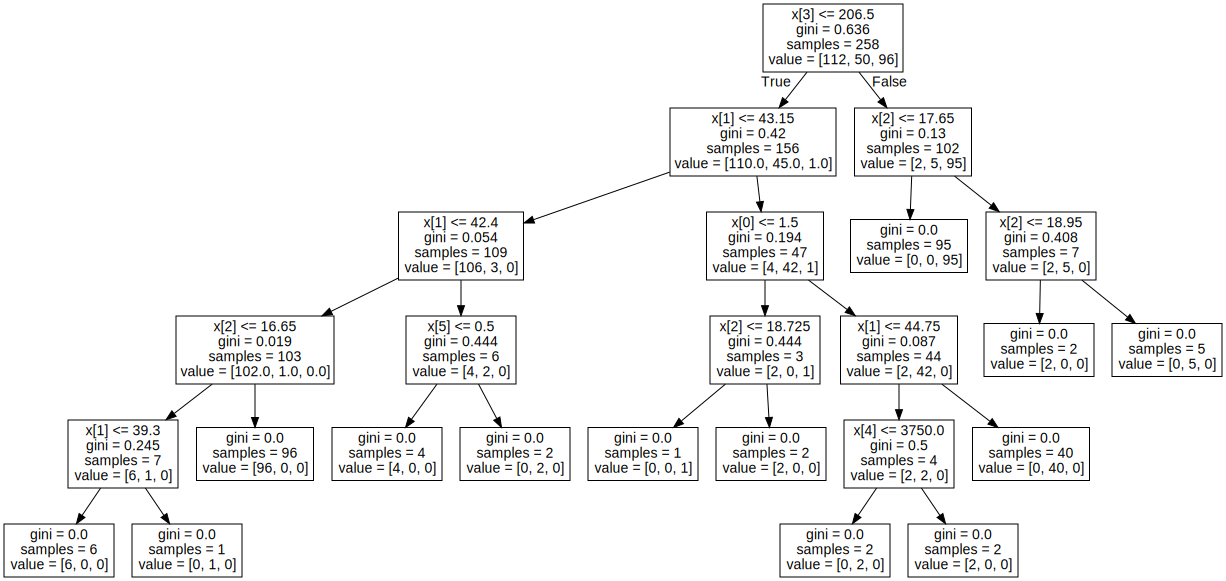

In [53]:
graph

---